In [6]:
import pandas as pd
annex2 = pd.read_csv("annex2.csv",nrows=80000)
annex2.head()


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [7]:
df = annex2.sample(50000, random_state=42).copy()

df["Revenue"] = df["Quantity Sold (kilo)"] * df["Unit Selling Price (RMB/kg)"]

df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Weekday"] = df["Datetime"].dt.day_name()
df["Hour"] = df["Datetime"].dt.hour

df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Revenue,Datetime,Year,Month,Weekday,Hour
47044,2020-08-12,16:37:15.092,102900005116714,0.300,14.0,sale,No,4.200,2020-08-12 16:37:15.092,2020,8,Wednesday,16
44295,2020-08-09,20:40:10.002,102900011009970,0.614,8.0,sale,No,4.912,2020-08-09 20:40:10.002,2020,8,Sunday,20
74783,2020-09-05,17:07:30.382,102900005117056,0.418,6.0,sale,No,2.508,2020-09-05 17:07:30.382,2020,9,Saturday,17
70975,2020-09-01,18:36:50.633,102900005125808,0.050,8.0,sale,No,0.400,2020-09-01 18:36:50.633,2020,9,Tuesday,18
46645,2020-08-12,10:08:58.248,102900005116714,0.315,14.0,sale,No,4.410,2020-08-12 10:08:58.248,2020,8,Wednesday,10


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [19]:
plt.style.use("ggplot")

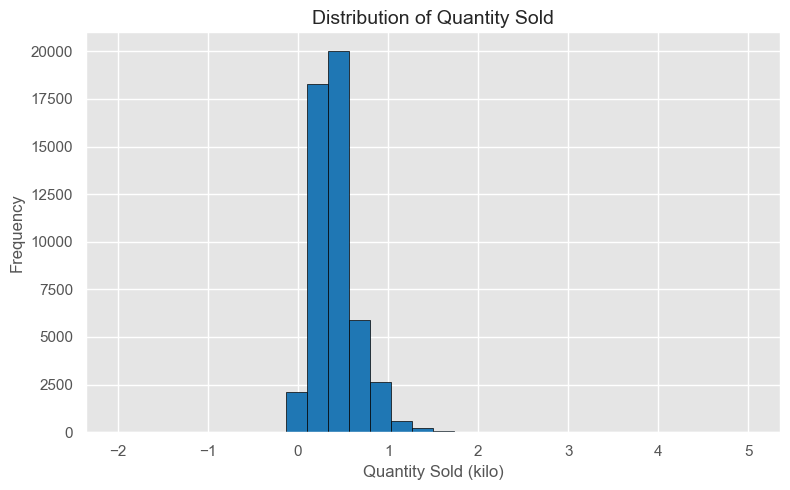

In [20]:
#QUANTITY SOLD DISTRIBUTION

plt.figure(figsize=(8,5))
plt.hist(df["Quantity Sold (kilo)"], bins=30, edgecolor='black', color='#1f77b4')
plt.title("Distribution of Quantity Sold", fontsize=14)
plt.xlabel("Quantity Sold (kilo)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

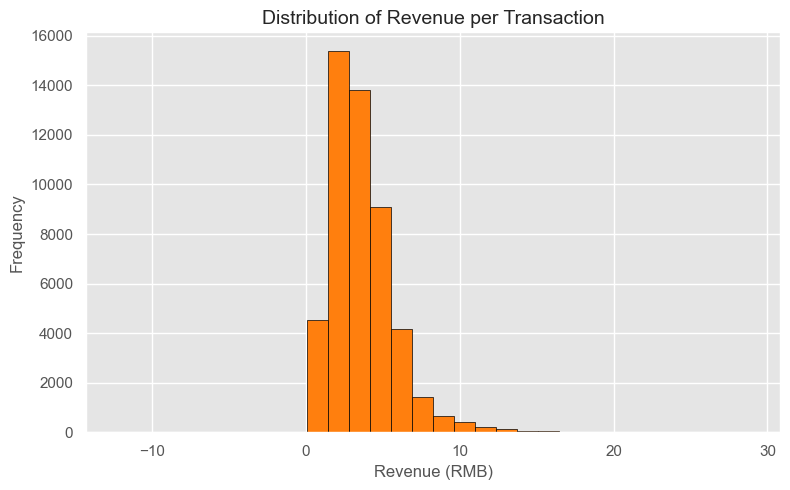

In [21]:
#REVENUE DISTRIBUTION

plt.figure(figsize=(8,5))
plt.hist(df["Revenue"], bins=30, edgecolor='black', color='#ff7f0e')
plt.title("Distribution of Revenue per Transaction", fontsize=14)
plt.xlabel("Revenue (RMB)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

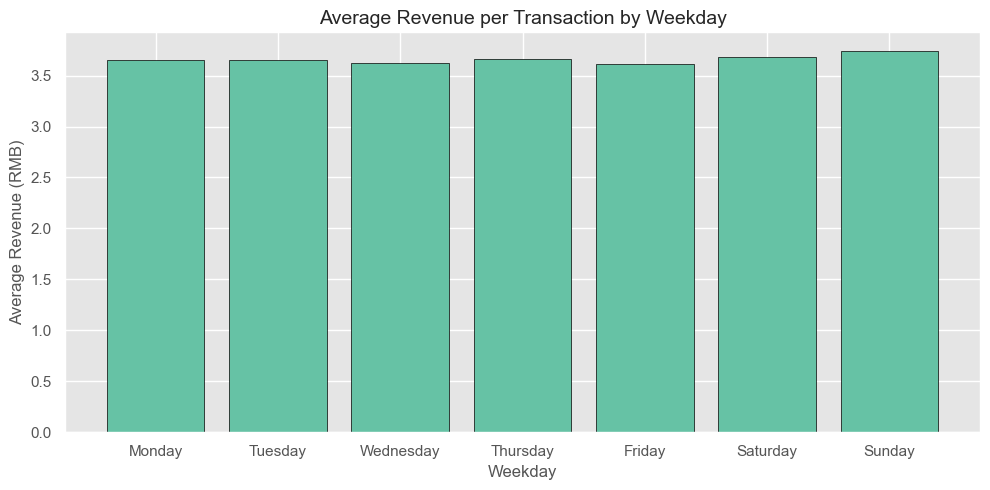

In [23]:
#AVERAGE REVENUE BY WEEKDAY

plt.figure(figsize=(10,5))
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
avg_rev_weekday = df.groupby("Weekday")["Revenue"].mean().reindex(weekday_order)

plt.bar(avg_rev_weekday.index, avg_rev_weekday.values, color="#66c2a5", edgecolor="black")
plt.title("Average Revenue per Transaction by Weekday", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Average Revenue (RMB)", fontsize=12)
plt.tight_layout()
plt.show()

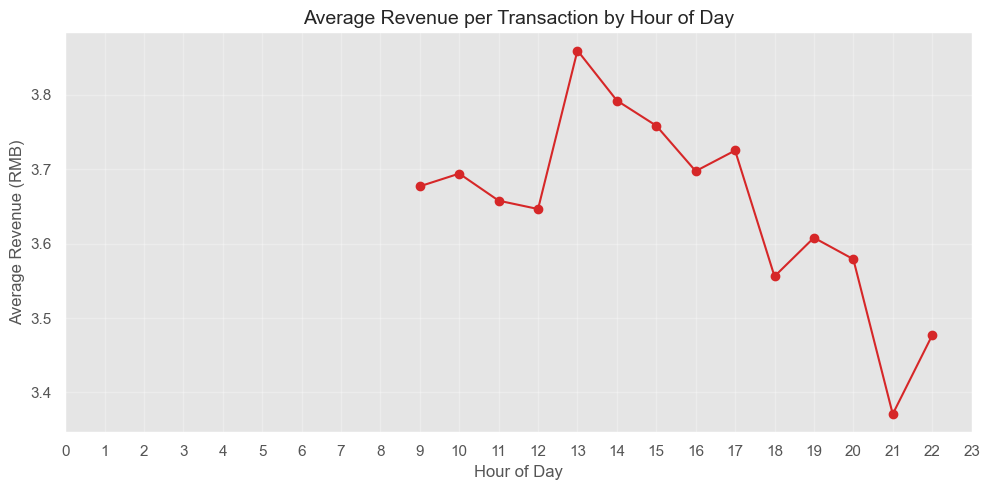

In [24]:
#AVERAGE REVENUE BY HOUR

plt.figure(figsize=(10,5))
avg_rev_hour = df.groupby("Hour")["Revenue"].mean()

plt.plot(avg_rev_hour.index, avg_rev_hour.values, marker="o", color="#d62728")
plt.title("Average Revenue per Transaction by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Revenue (RMB)", fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

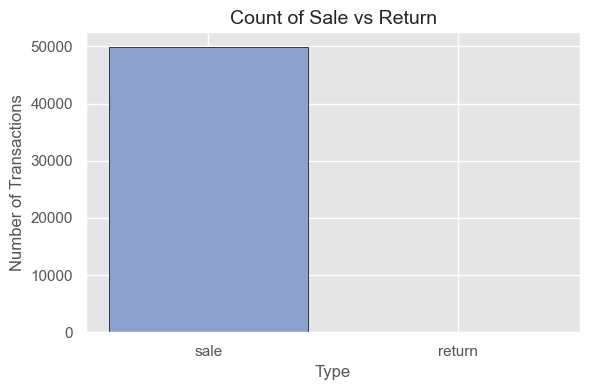

In [25]:
#SALE VS RETURN(COUNT)

plt.figure(figsize=(6,4))
counts = df["Sale or Return"].value_counts()

plt.bar(counts.index, counts.values, color="#8da0cb", edgecolor="black")
plt.title("Count of Sale vs Return", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.tight_layout()
plt.show()

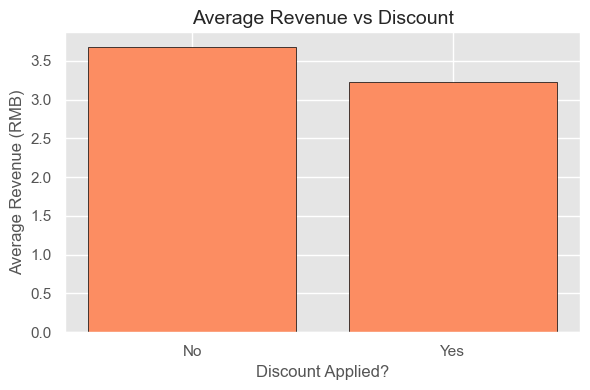

In [26]:
#REVENUE WITH VS WITHOUT DISCOUNT

plt.figure(figsize=(6,4))

avg_rev_discount = df.groupby("Discount (Yes/No)")["Revenue"].mean()

plt.bar(avg_rev_discount.index, avg_rev_discount.values, color="#fc8d62", edgecolor="black")
plt.title("Average Revenue vs Discount", fontsize=14)
plt.xlabel("Discount Applied?", fontsize=12)
plt.ylabel("Average Revenue (RMB)", fontsize=12)
plt.tight_layout()
plt.show()